In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/serge/para/1_projects/course_385/24s-385/private/385s24/week-01':
  os.chdir(r'/home/serge/para/1_projects/course_385/24s-385/private/385s24/week-01')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/home/serge/miniforge3/envs/385s24/lib/python3.12/importlib/_bootstrap.py": 1703320000.8199344, "/home/serge/miniforge3/envs/385s24/lib/python3.12/importlib/_bootstrap_external.py": 1703320000.8199344, "/home/serge/miniforge3/envs/385s24/lib/python3.12/zipimport.py": 1703320000.1839273, "/home/serge/miniforge3/envs/385s24/lib/python3.12/codecs.py": 1703319999.9079244, "/home/serge/miniforge3/envs/385s24/lib/python3.12/encodings/aliases.py": 1703320000.3879297, "/home/serge/miniforge3/envs/385s24/lib/python3.12/encodings/__init__.py": 1703320000.4839306, "/home/serge/miniforge3/envs/385s24/lib/python3.12/encodings/utf_8.py": 1703320000.5799317, "/home/serge/miniforge3/envs/385s24/lib/python3.12/abc.py": 1703319999.879924, "/home/serge/miniforge3/envs/385s24/lib/python3.12/io.py": 1703319999.9879253, "/home/serge/miniforge3/envs/385s24/lib/python3.12/stat.py": 1703320000.1159265, "/home/serge/miniforge3/envs/385s24/lib/python3.12/_collections_abc.py": 1703319999.9159243, "/home/serge/m

/tmp/ipykernel_1074984/2054757330.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


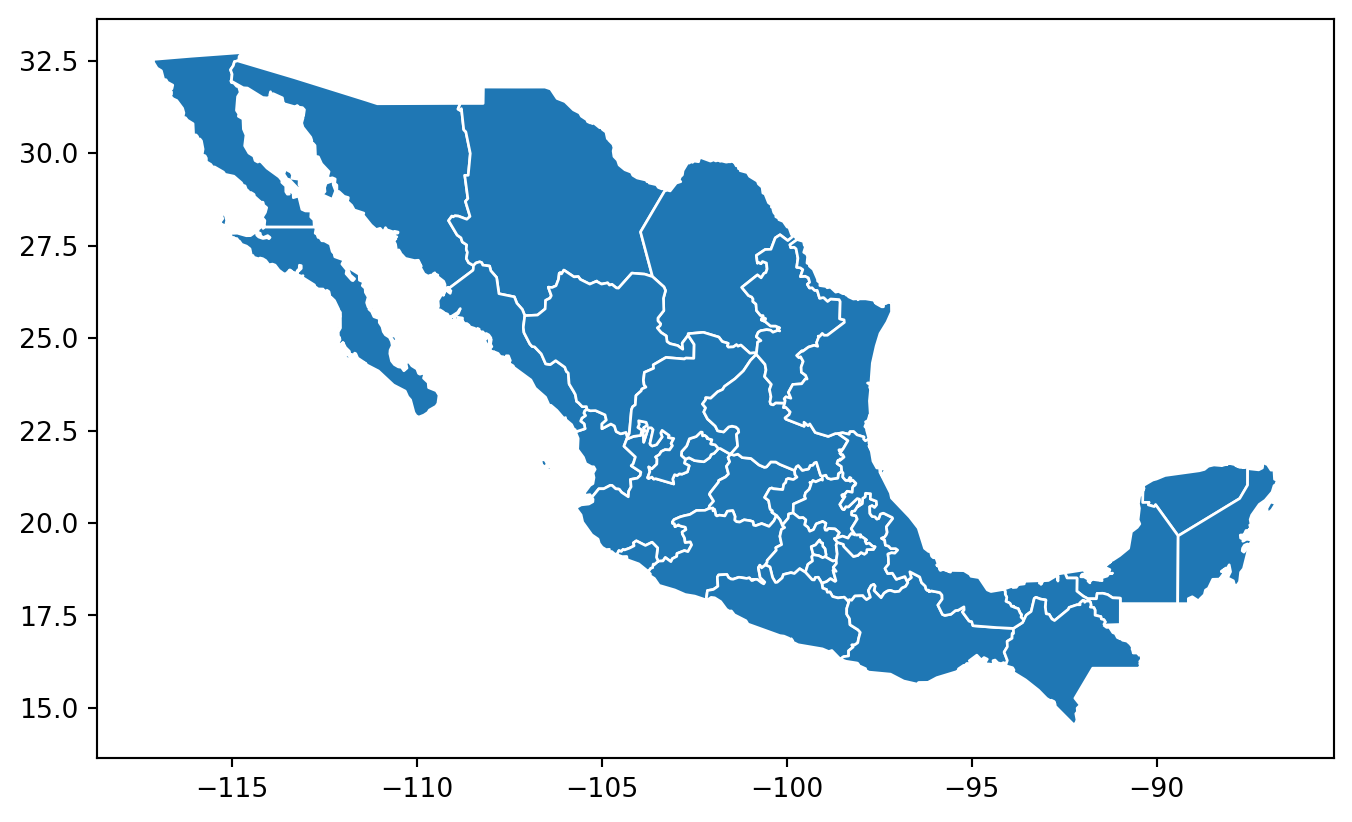

In [2]:
#| echo: true
#| code-fold: true
#| code-summary: Show me the code

import libpysal.examples
import geopandas 

# get path to built-in dataset for Mexico
pth = libpysal.examples.get_path("mexicojoin.shp")
# load the file with geopandas to create a GeoDataframe
gdf = geopandas.read_file(pth)
# call the plot method of the GeoDataFrame
gdf.plot(edgecolor='white');